In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

from utils.process import categorize
from utils.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'sklearn'

## Import dataset

In [2]:
# See working directory (No need, just for myself)
os.getcwd()

'/home/brendan/Documents/Jupyter/projet_data'

In [3]:
df = pd.read_csv('./data_cars.csv')

In [4]:
df.head(10)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."
5,27956.0,BMW,X3,2012,95623.0 km,Diesel,automatique,14/03/2018 à 4h24,"modele: X3 F25, version: (F25) XDRIVE35D 313 S..."
6,16888.0,AUDI,A3,2013,49018.0 km,Diesel,mécanique,16/04/2018 à 21h35,"modele: A3 (2E GENERATION) SPORTBACK, version:..."
7,18188.0,RENAULT,MEGANE,2017,9795.0 km,Diesel,automatique,29/04/2018 à 12h44,"modele: MEGANE 4 ESTATE, version: IV ESTATE 1...."
8,10594.0,FORD,C-MAX,2012,126670.0 km,Diesel,mécanique,22/06/2018 à 5h11,"modele: C-MAX 2, version: II 1.6 TDCI 115 FAP ..."
9,69131.0,MERCEDES,CLASSE C,2015,39439.0 km,Essence,automatique,08/03/2018 à 17h35,"modele: CLASSE C 4 AMG, version: (W205) 63 AMG..."


## Observations

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

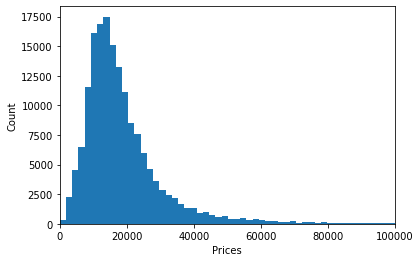

In [6]:
# Price repartition
plt.hist(df["Price"], 800)
plt.xlim(0, 100000)
plt.xlabel('Prices')
plt.ylabel('Count')
plt.show()

Les prix semblent s'agglutiner entre 20000 et 25000 €

In [7]:
# relation between mileage and price
#plt.hist(df['Mileage'],df['Price'])
#plt.xlim(0, 100000)
#plt.xlabel("Mileage")
#plt.ylabel("Price")
#plt.xlim(0, 90000)

Text(0, 0.5, 'Number of cars')

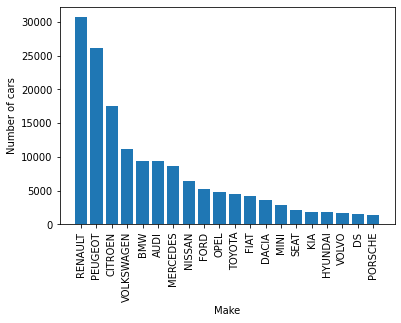

In [8]:
# Make cars counts
counts = df["Make"].value_counts().iloc[0:20]
names = counts.keys().to_numpy()
values = counts.to_numpy()

plt.bar(names, values)
plt.xticks(rotation="vertical")
plt.xlabel("Make")
plt.ylabel("Number of cars")

Le dataset contient beaucoup de voitures Renault, Peugeot et Citroen que de voitures de marque étrangère (BMW, Ford, Mercedes)

## Some data cleaning

### Data Modification

In [9]:
# Getting the number of doors on the car
import re
df['Nbre_porte'] = df['Description'].str.extract("portes: (.)")

In [10]:
# Getting the horse power of a car
df['CV'] = df['Description'].str.extract("puissance_fiscale: (..)")
df['CV'] = df['CV'].str.replace(',', '')

In [11]:
# We choose 2018 because it was the year the sellers published their offers
df['Model_year'] = df.apply(lambda row: 2018 - row.Model_year, axis = 1)
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Nbre_porte,CV
0,11220.0,PEUGEOT,308,4,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",5,4
1,57526.0,BMW,X6,3,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",5,16
2,80379.0,AUDI,RS6,4,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",5,47
3,2830.0,FORD,KA,11,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",3,5
4,12925.0,FIAT,TIPO,0,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,5


### Data checks

In [12]:
# Check for null values
df.isnull().sum()

Price          0
Make           0
Model          0
Model_year     0
Mileage        0
Fuel           0
Gearbox        0
Online         0
Description    0
Nbre_porte     0
CV             0
dtype: int64

In [13]:
# Check for invalid numbers
df.isna().sum()

Price          0
Make           0
Model          0
Model_year     0
Mileage        0
Fuel           0
Gearbox        0
Online         0
Description    0
Nbre_porte     0
CV             0
dtype: int64

In [14]:
# Find empty strings
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

### Data types conversions

In [15]:
## Remove kilometers and convert to number
df["Mileage"] = df["Mileage"].str.replace(' km', '').astype("float64")
df.head(5)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Nbre_porte,CV
0,11220.0,PEUGEOT,308,4,94341.0,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",5,4
1,57526.0,BMW,X6,3,39051.0,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",5,16
2,80379.0,AUDI,RS6,4,75381.0,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",5,47
3,2830.0,FORD,KA,11,92282.0,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",3,5
4,12925.0,FIAT,TIPO,0,10.0,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,5


In [16]:
df.dtypes['Mileage']

dtype('float64')

In [17]:
df["Mileage"].isna().sum()

0

In [18]:
# Reduce allocated bytes size for "Model_year" 
df["Model_year"] = df["Model_year"].astype("int16")

In [19]:
# We don't really need the "Online" column as it seems to indicate the last user authentication
df = df.drop("Online", axis=1)
df = df.drop("Description", axis=1)

In [20]:
# This will delete 1000 rows so it not might be the best method
indexNames = df[(df['Nbre_porte'] == ',')].index
df.drop(indexNames , inplace=True)
df['Nbre_porte'] = df['Nbre_porte'].astype(str).astype(int)

In [21]:
df['CV'] = df['CV'].astype(int)

## Detecting outliers

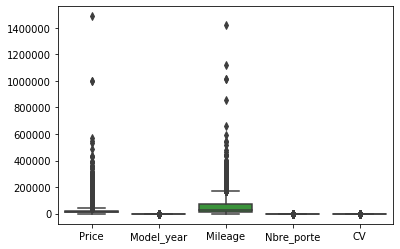

In [22]:
sns.boxplot(data=df)

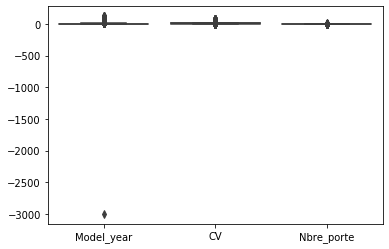

In [23]:
sns.boxplot(data=df[['Make','Model_year','CV','Nbre_porte']])

In [24]:
df = df.drop(df[df.Model_year < 0].index)

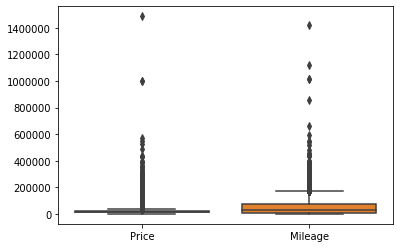

In [25]:
sns.boxplot(data=df[['Price','Mileage']])

Les ranges des columns sont beaucoup trop différentes, il va falloir les transformer pour avoir une meilleure précision pour notre modèle

In [26]:
df.shape

(165405, 9)

In [27]:
from scipy import stats
#z=np.abs(stats.zscore(df['Price']))
z2=np.abs(stats.zscore(df['Mileage']))
print(z2)


[0.99097803 0.16042469 0.59613999 ... 0.79072865 1.34495784 1.09633065]


In [28]:
threshold=3
#print(np.where(z>3))
print(np.where(z2>3))

(array([    17,     32,     40, ..., 165186, 165360, 165361]),)


In [29]:
df2=df[(z2< 3)]
print(df2)

          Price        Make     Model  Model_year   Mileage  \
0       11220.0     PEUGEOT       308           4   94341.0   
1       57526.0         BMW        X6           3   39051.0   
2       80379.0        AUDI       RS6           4   75381.0   
3        2830.0        FORD        KA          11   92282.0   
4       12925.0        FIAT      TIPO           0      10.0   
5       27956.0         BMW        X3           6   95623.0   
6       16888.0        AUDI        A3           5   49018.0   
7       18188.0     RENAULT    MEGANE           1    9795.0   
8       10594.0        FORD     C-MAX           6  126670.0   
9       69131.0    MERCEDES  CLASSE C           3   39439.0   
10      14158.0        SEAT     IBIZA           1   12464.0   
11      18824.0        MINI      MINI           3   25662.0   
12      18683.0        FIAT     500 X           1   25693.0   
13       2945.0        FORD    MONDEO          14  113417.0   
14       6934.0     HYUNDAI       I20           6   384

In [ ]:
df2.shape

(163375, 9)

In [31]:
df1=df2.copy()

### Hot encoding

In [ ]:
# List categorical columns
df["Fuel"].unique()

array(['Diesel', 'Essence', 'Hybride essence électrique', 'Electrique',
       'Hybride diesel électrique', 'Bicarburation essence GPL',
       'Bicarburation essence bioéthanol'], dtype=object)

In [ ]:
# List categorical columns for Gearbox
df["Gearbox"].unique()

array(['mécanique', 'automatique'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=["Gearbox"], drop_first=True)

In [ ]:
# List categorical columns
df = pd.get_dummies(df, columns=["Fuel"])

In [ ]:
df.head(5)

,Price,Make,Model,Model_year,Mileage,Nbre_porte,CV,Gearbox_mécanique,Fuel_Bicarburation essence GPL,Fuel_Bicarburation essence bioéthanol,Fuel_Diesel,Fuel_Electrique,Fuel_Essence,Fuel_Hybride diesel électrique,Fuel_Hybride essence électrique
0,11220.0,PEUGEOT,308,4,94341.0,5,4,1,0,0,1,0,0,0,0
1,57526.0,BMW,X6,3,39051.0,5,16,0,0,0,1,0,0,0,0
2,80379.0,AUDI,RS6,4,75381.0,5,47,0,0,0,0,0,1,0,0
3,2830.0,FORD,KA,11,92282.0,3,5,1,0,0,0,0,1,0,0
4,12925.0,FIAT,TIPO,0,10.0,5,5,1,0,0,0,0,1,0,0


In [ ]:
np.sort(df['Make'].unique())

array(['ABARTH', 'AC', 'AIXAM', 'ALFA ROMEO', 'ALPINA', 'ALPINE',
       'ASTON MARTIN', 'AUDI', 'AUSTIN', 'AUSTIN HEALEY', 'AUTOBIANCHI',
       'BELLIER', 'BENTLEY', 'BMW', 'BMW-ALPINA', 'BOLLORE', 'BUGATTI',
       'CADILLAC', 'CHATENET', 'CHEVROLET', 'CHRYSLER', 'CITROEN',
       'DACIA', 'DAEWOO', 'DAIHATSU', 'DANGEL', 'DODGE', 'DONKERVOORT',
       'DS', 'FERRARI', 'FIAT', 'FISKER', 'FORD', 'GRECAV', 'HONDA',
       'HUMMER', 'HYUNDAI', 'INFINITI', 'INNOCENTI', 'INTERMECCANICA',
       'JAGUAR', 'JEEP', 'JIAYUAN', 'KIA', 'LADA', 'LAMBORGHINI',
       'LANCIA', 'LAND ROVER', 'LEXUS', 'LIGIER', 'LOTUS', 'MASERATI',
       'MATRA', 'MAZDA', 'MCLAREN', 'MERCEDES', 'MERCEDES-AMG', 'MG',
       'MICROCAR', 'MINI', 'MITSUBISHI', 'MORGAN', 'MPM MOTORS', 'NISSAN',
       'OLDSMOBILE', 'OPEL', 'PACKARD', 'PEUGEOT', 'PORSCHE', 'RENAULT',
       'RILEY', 'ROLLS ROYCE', 'ROVER', 'SAAB', 'SEAT', 'SHELBY', 'SIMCA',
       'SKODA', 'SMART', 'SSANGYONG', 'SUBARU', 'SUNBEAM', 'SUZUKI',
       'TES

In [ ]:
# Transform makes to ordinal numbers
df['Make'] = categorize(df['Make'])
df['Make'].head(5)

0    0
1    1
2    2
3    3
4    4
Name: Make, dtype: int8

In [ ]:
np.sort(df['Model'].unique()[0:60])

array(['2008', '208', '3008', '308', '407', '500', '500 X', '5008', 'A3',
       'A4', 'A5', 'ARONA', 'ASTRA', 'AURIS', 'C-MAX', 'C3', 'C4',
       'C4 PICASSO', 'C5', 'CLASSE A', 'CLASSE B', 'CLASSE C', 'CLASSE R',
       'CLIO', 'DS3', 'DUSTER', 'GOLF', 'GRAND C-MAX',
       'GRAND C4 SPACETOURER', 'GRAND SCENIC', 'I20', 'I30', 'IBIZA',
       'KA', 'KADJAR', 'KOLEOS', 'KUGA', 'MACAN', 'MEGANE', 'MINI',
       'MONDEO', 'PASSAT', 'POLO', 'QASHQAI', 'RS6', 'SANDERO', 'SCENIC',
       'SERIE 1', 'SERIE 2', 'SERIE 3 GT', 'SERIE 5', 'SL', 'TALISMAN',
       'TIGUAN', 'TIPO', 'TOURAN', 'TWINGO', 'X3', 'X6', 'XKR'],
      dtype=object)

In [ ]:
# Transform models to ordinal numbers
df['Model'] = categorize(df['Model'])
df['Model'].head(5)

0    0
1    1
2    2
3    3
4    4
Name: Model, dtype: int16

In [ ]:
df.head()

,Price,Make,Model,Model_year,Mileage,Nbre_porte,CV,Gearbox_mécanique,Fuel_Bicarburation essence GPL,Fuel_Bicarburation essence bioéthanol,Fuel_Diesel,Fuel_Electrique,Fuel_Essence,Fuel_Hybride diesel électrique,Fuel_Hybride essence électrique
0,11220.0,0,0,4,94341.0,5,4,1,0,0,1,0,0,0,0
1,57526.0,1,1,3,39051.0,5,16,0,0,0,1,0,0,0,0
2,80379.0,2,2,4,75381.0,5,47,0,0,0,0,0,1,0,0
3,2830.0,3,3,11,92282.0,3,5,1,0,0,0,0,1,0,0
4,12925.0,4,4,0,10.0,5,5,1,0,0,0,0,1,0,0


In [ ]:
df.dtypes

Price                                    float64
Make                                        int8
Model                                      int16
Model_year                                 int16
Mileage                                  float64
Nbre_porte                                 int64
CV                                         int64
Gearbox_mécanique                          uint8
Fuel_Bicarburation essence GPL             uint8
Fuel_Bicarburation essence bioéthanol      uint8
Fuel_Diesel                                uint8
Fuel_Electrique                            uint8
Fuel_Essence                               uint8
Fuel_Hybride diesel électrique             uint8
Fuel_Hybride essence électrique            uint8
dtype: object

## Features selection

In [37]:
plt.figure(figsize=(10, 10))
corrplot(corr)

NameError: name 'corrplot' is not defined

<Figure size 720x720 with 0 Axes>

Pour l'instant il n'y a que "CV" qui a un bon taux de correlation avec "Price"

## Split

In [ ]:
features = [
    "Make",
    "Model", 
    "Model_year",
    "Mileage",
    "CV",
    "Fuel_Bicarburation essence GPL",
    "Fuel_Bicarburation essence bioéthanol",
    "Fuel_Diesel",
    "Fuel_Electrique",
    "Fuel_Essence",
    "Gearbox_mécanique",
]

prediction = "Price"

X = df[features]
y = df[prediction]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

<<<<<<< local


NameError: name 'X_train' is not defined

>>>>>>> remote


<<<<<<< local <removed>


((115783, 11), (49622, 11), (115783,), (49622,))

>>>>>>> remote <modified: text/plain>


In [ ]:
X_train.head(5)

<<<<<<< local


NameError: name 'X_train' is not defined

>>>>>>> remote


<<<<<<< local <removed>


,Make,Model,Model_year,Mileage,CV,Fuel_Bicarburation essence GPL,Fuel_Bicarburation essence bioéthanol,Fuel_Diesel,Fuel_Electrique,Fuel_Essence,Gearbox_mécanique
53439,5,7,5,98490.0,6,0,0,1,0,0,1
77027,12,18,7,96092.0,5,0,0,1,0,0,1
145900,15,156,2,4960.0,5,0,0,1,0,0,1
137408,0,315,8,81081.0,5,0,0,0,0,1,1
152547,15,254,2,35312.0,7,0,0,1,0,0,0


>>>>>>> remote <modified: text/html, text/plain>


In [ ]:
y_train.head(5)

<<<<<<< local


NameError: name 'y_train' is not defined

>>>>>>> remote


<<<<<<< local <removed>


53439      8854.0
77027      7902.0
145900    16555.0
137408     5479.0
152547    21053.0
Name: Price, dtype: float64

>>>>>>> remote <modified: text/plain>


## Train / Predict

In [ ]:
lreg = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [ ]:
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

NameError: name 'lreg' is not defined

In [ ]:
mean_squared_error(y_test, y_pred)

<<<<<<< local


NameError: name 'mean_squared_error' is not defined

138557154.33948147

>>>>>>> remote


In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

<<<<<<< local


NameError: name 'y_test' is not defined

35.84158377021364

>>>>>>> remote


In [ ]:
r2_score(y_test, y_pred)

<<<<<<< local


NameError: name 'r2_score' is not defined

0.5696411066569036

>>>>>>> remote


In [52]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


y_true = np.random.randn(100)
y_pred = y_true * 3.5

print(mean_absolute_percentage_error(y_true, y_pred))

250.0


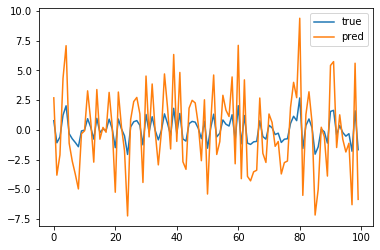

In [53]:
from matplotlib import pyplot as plt

plt.plot(y_true)
plt.plot(y_pred)
plt.legend(["true", "pred"])
plt.show()

##  Test with manual encoding and label encoding

In [ ]:
make_label = {ni: n for n,ni in enumerate(set(df1['Make']))}
model_label = {ni: n for n,ni in enumerate(set(df1['Model']))}
fuel_label = {ni: n for n,ni in enumerate(set(df1['Fuel']))}
gearbox_label = {ni: n for n,ni in enumerate(set(df1['Gearbox']))}

KeyError: 'Fuel'

In [ ]:
fuel_label

<<<<<<< local


NameError: name 'fuel_label' is not defined

{'Bicarburation essence GPL': 0,
 'Essence': 1,
 'Bicarburation essence bioéthanol': 2,
 'Electrique': 3,
 'Diesel': 4,
 'Hybride essence électrique': 5,
 'Hybride diesel électrique': 6}

>>>>>>> remote


In [ ]:
df1['Fuel'].unique()

KeyError: 'Fuel'

In [ ]:
df1['Make'].unique()

<<<<<<< local


array([-1.01704475, -0.89526194, -0.77347912, -0.6516963 , -0.52991348,
       -0.40813066, -0.28634785, -0.16456503, -0.04278221,  0.07900061,
        0.20078343,  0.32256624,  0.44434906,  0.56613188,  0.6879147 ,
        0.80969752,  0.93148033,  1.05326315,  1.17504597,  1.29682879,
        1.41861161,  1.54039442,  1.66217724,  1.78396006,  1.90574288,
        2.0275257 ,  2.14930851,  2.27109133,  2.39287415,  2.51465697,
        2.63643979,  2.7582226 ,  2.88000542,  3.00178824,  3.12357106,
        3.24535387,  3.36713669,  3.48891951,  3.61070233,  3.73248515,
        3.85426796,  3.97605078,  4.0978336 ,  4.21961642,  4.34139924,
        4.46318205,  4.58496487,  4.70674769,  4.82853051,  4.95031333,
        5.07209614,  5.19387896,  5.31566178,  5.4374446 ,  5.55922742,
        5.68101023,  5.80279305,  5.92457587,  6.04635869,  6.16814151,
        6.28992432,  6.41170714,  6.53348996,  6.65527278,  6.7770556 ,
        6.89883841,  7.02062123,  7.14240405,  7.26418687,  7.38

>>>>>>> remote


<<<<<<< local <removed>


array(['PEUGEOT', 'BMW', 'AUDI', 'FORD', 'FIAT', 'RENAULT', 'MERCEDES',
       'SEAT', 'MINI', 'HYUNDAI', 'DACIA', 'CITROEN', 'TOYOTA',
       'VOLKSWAGEN', 'JAGUAR', 'OPEL', 'PORSCHE', 'NISSAN', 'LAND ROVER',
       'MAZDA', 'VOLVO', 'SKODA', 'DS', 'SSANGYONG', 'SUZUKI', 'HONDA',
       'LEXUS', 'INFINITI', 'JEEP', 'KIA', 'DODGE', 'ASTON MARTIN',
       'LANCIA', 'LOTUS', 'CHEVROLET', 'SMART', 'ALFA ROMEO', 'BUGATTI',
       'MITSUBISHI', 'MERCEDES-AMG', 'AIXAM', 'FERRARI', 'MG',
       'LAMBORGHINI', 'MASERATI', 'SUBARU', 'MORGAN', 'CHRYSLER',
       'ROLLS ROYCE', 'TESLA', 'ABARTH', 'LADA', 'BMW-ALPINA', 'SAAB',
       'PACKARD', 'ROVER', 'SHELBY', 'MICROCAR', 'ALPINA', 'BENTLEY',
       'HUMMER', 'TRIUMPH', 'LIGIER', 'DAEWOO', 'AUSTIN HEALEY',
       'JIAYUAN', 'CADILLAC', 'MCLAREN', 'DAIHATSU', 'DANGEL', 'CHATENET',
       'INTERMECCANICA', 'AC', 'AUTOBIANCHI', 'SUNBEAM', 'BOLLORE',
       'AUSTIN', 'MPM MOTORS', 'INNOCENTI', 'MATRA', 'DONKERVOORT',
       'GRECAV', 'FISKER', 'ALP

>>>>>>> remote <modified: text/plain>


In [ ]:
df1['Model'].unique()

<<<<<<< local


array([-8.69452018e-01, -8.59774893e-01, -8.50097768e-01, -8.40420642e-01,
       -8.30743517e-01, -8.21066392e-01, -8.11389267e-01, -8.01712142e-01,
       -7.92035016e-01, -7.82357891e-01, -7.72680766e-01, -7.63003641e-01,
       -7.53326515e-01, -7.43649390e-01, -7.33972265e-01, -7.24295140e-01,
       -7.14618015e-01, -7.04940889e-01, -6.95263764e-01, -6.85586639e-01,
       -6.75909514e-01, -6.66232388e-01, -6.56555263e-01, -6.46878138e-01,
       -6.37201013e-01, -6.27523888e-01, -6.17846762e-01, -6.08169637e-01,
       -5.98492512e-01, -5.88815387e-01, -5.79138261e-01, -5.69461136e-01,
       -5.59784011e-01, -5.50106886e-01, -5.40429761e-01, -5.30752635e-01,
       -5.21075510e-01, -5.11398385e-01, -5.01721260e-01, -4.92044134e-01,
       -4.82367009e-01, -4.72689884e-01, -4.63012759e-01, -4.53335634e-01,
       -4.43658508e-01, -4.33981383e-01, -4.24304258e-01, -4.14627133e-01,
       -4.04950007e-01, -3.95272882e-01, -3.85595757e-01, -3.75918632e-01,
       -3.66241506e-01, -

>>>>>>> remote


<<<<<<< local <removed>


array(['308', 'X6', 'RS6', 'KA', 'TIPO', 'X3', 'A3', 'MEGANE', 'C-MAX',
       'CLASSE C', 'IBIZA', 'MINI', '500 X', 'MONDEO', 'I20', 'SANDERO',
       '208', 'C3', 'AURIS', 'I30', 'POLO', 'SERIE 1', 'XKR', 'CLASSE B',
       'CLIO', 'TOURAN', 'TIGUAN', 'TALISMAN', 'ASTRA', 'GRAND SCENIC',
       'A4', 'DS3', 'GOLF', 'DUSTER', 'MACAN', 'QASHQAI', 'KADJAR',
       'SCENIC', 'A5', 'TWINGO', 'PASSAT', 'ARONA', 'GRAND C-MAX', 'KUGA',
       'SERIE 2', 'SL', '500', 'C4', '5008', '3008',
       'GRAND C4 SPACETOURER', 'KOLEOS', 'CLASSE A', 'C4 PICASSO', '2008',
       'SERIE 5', 'C5', 'SERIE 3 GT', 'C3 AIRCROSS', 'LEON', 'TUCSON',
       'RANGE ROVER EVOQUE', 'ESPACE', 'A7', 'SERIE 3', 'ZAFIRA', '6',
       'XC60', '1007', 'AVENSIS', 'OCTAVIA', 'YARIS', 'JUKE', '508 RXH',
       'V40', '108', '508', 'SERIE 4', 'DS 5', 'CAPTUR', 'GLA', '307',
       'TRAVELLER', 'CORSA', 'COCCINELLE', 'RAV 4', 'KYRON', 'X5',
       'S-MAX', 'SX4', 'MOKKA X', 'X1', 'PARTNER TEPEE', 'C4 CACTUS',
       'SUPERB'

>>>>>>> remote <modified: text/plain>


In [ ]:
df1['Gearbox'].unique()

KeyError: 'Gearbox'

In [ ]:
print('make_label = {}'.format(make_label))
print('model_label = {}'.format(model_label))
print('fuel_label = {}'.format(fuel_label))
print('gearbox_label = {}'.format(gearbox_label))

<<<<<<< local


46896374083551955: 16, 0.04019775293510009: 17, 3.0013980715692696: 18, 3.349774579643878: 19, 3.698151087718486: 20, 4.046527595793094: 21, 4.394904103867702: 22, 4.7432806119423105: 23, 5.140042746138391: 24, 5.4884192542129995: 25, 5.836795762287608: 26, 6.185172270362216: 27, 6.533548778436824: 28, 6.881925286511432: 29, -0.22108462812085602: 30, 1.3079011573177022: 31, 1.6562776653923104: 32, 6.998050789202968: 33, 2.0046541734669185: 34, 2.3530306815415267: 35, 2.701407189616135: 36, 3.049783697690743: 37, 3.3981602057653513: 38, 3.7465367138399595: 39, 4.094913221914568: 40, 4.443289729989176: 41, 4.791666238063784: 42, 0.5046997637012444: 43, 5.188428372259865: 44, 5.536804880334473: 45, 5.885181388409081: 46, 6.233557896483689: 47, 6.5819344045582975: 48, 6.930310912632906: 49, 3.6207340859241284: 50, 0.7466278943086111: 51, 3.9691105939987366: 52, 1.0950044023832193: 53, 1.4433809104578275: 54, 1.7917574185324356: 55, -0.48236700917681213: 56, 2.053039799588392: 57, 2.4014163

NameError: name 'fuel_label' is not defined

make_label = {'RILEY': 0, 'AUSTIN HEALEY': 1, 'VOLVO': 2, 'TRIUMPH': 3, 'MPM MOTORS': 4, 'GRECAV': 5, 'FISKER': 6, 'ASTON MARTIN': 7, 'OLDSMOBILE': 8, 'MCLAREN': 9, 'SKODA': 10, 'MITSUBISHI': 11, 'BMW-ALPINA': 12, 'SUBARU': 13, 'SMART': 14, 'BOLLORE': 15, 'LANCIA': 16, 'FORD': 17, 'MG': 18, 'JIAYUAN': 19, 'INTERMECCANICA': 20, 'BENTLEY': 21, 'MICROCAR': 22, 'RENAULT': 23, 'INNOCENTI': 24, 'MERCEDES-AMG': 25, 'AC': 26, 'MORGAN': 27, 'OPEL': 28, 'PACKARD': 29, 'BMW': 30, 'BELLIER': 31, 'LOTUS': 32, 'ROLLS ROYCE': 33, 'HUMMER': 34, 'KIA': 35, 'SIMCA': 36, 'LAMBORGHINI': 37, 'MASERATI': 38, 'MATRA': 39, 'TESLA': 40, 'AUTOBIANCHI': 41, 'SAAB': 42, 'JAGUAR': 43, 'SHELBY': 44, 'LIGIER': 45, 'ALFA ROMEO': 46, 'PORSCHE': 47, 'DANGEL': 48, 'HYUNDAI': 49, 'SSANGYONG': 50, 'INFINITI': 51, 'BUGATTI': 52, 'DACIA': 53, 'DONKERVOORT': 54, 'CHATENET': 55, 'AUSTIN': 56, 'CHRYSLER': 57, 'FERRARI': 58, 'PEUGEOT': 59, 'JEEP': 60, 'MERCEDES': 61, 'VOLKSWAGEN': 62, 'CADILLAC': 63, 'LEXUS': 64, 'NISSAN': 65, 

>>>>>>> remote


In [ ]:
df1.head()

,Price,Make,Model,Model_year,Mileage,Nbre_porte,CV,Gearbox_mécanique,Fuel_Bicarburation essence GPL,Fuel_Bicarburation essence bioéthanol,Fuel_Diesel,Fuel_Electrique,Fuel_Essence,Fuel_Hybride diesel électrique,Fuel_Hybride essence électrique
0,-0.495465,-1.017045,-0.869452,0.074873,0.990981,0.402692,-0.646410,0.690285,-0.024098,-0.011268,0.723732,-0.064723,-0.686908,-0.043332,-0.129158
1,2.336431,-0.895262,-0.859775,-0.045629,-0.160419,0.402692,1.887532,-1.448668,-0.024098,-0.011268,0.723732,-0.064723,-0.686908,-0.043332,-0.129158
2,3.734032,-0.773479,-0.850098,0.074873,0.596144,0.402692,8.433551,-1.448668,-0.024098,-0.011268,-1.381719,-0.064723,1.455790,-0.043332,-0.129158
3,-1.008565,-0.651696,-0.840421,0.918391,0.948103,-2.201915,-0.435248,0.690285,-0.024098,-0.011268,-1.381719,-0.064723,1.455790,-0.043332,-0.129158
4,-0.391194,-0.529913,-0.830744,-0.407136,-0.973437,0.402692,-0.435248,0.690285,-0.024098,-0.011268,-1.381719,-0.064723,1.455790,-0.043332,-0.129158


In [ ]:
df1['Make'] = df1['Make'].map(make_label)
df1['Model'] = df1['Model'].map(model_label)
df1['Fuel'] = df1['Fuel'].map(fuel_label)
df1['Gearbox'] = df1['Gearbox'].map(gearbox_label)

KeyError: 'Fuel'

In [ ]:
df1.head()

<<<<<<< local


,Price,Make,Model,Model_year,Mileage,Nbre_porte,CV,Gearbox_mécanique,Fuel_Bicarburation essence GPL,Fuel_Bicarburation essence bioéthanol,Fuel_Diesel,Fuel_Electrique,Fuel_Essence,Fuel_Hybride diesel électrique,Fuel_Hybride essence électrique
0,-0.495465,87,0,0.074873,0.990981,0.402692,-0.646410,0.690285,-0.024098,-0.011268,0.723732,-0.064723,-0.686908,-0.043332,-0.129158
1,2.336431,0,624,-0.045629,-0.160419,0.402692,1.887532,-1.448668,-0.024098,-0.011268,0.723732,-0.064723,-0.686908,-0.043332,-0.129158
2,3.734032,51,416,0.074873,0.596144,0.402692,8.433551,-1.448668,-0.024098,-0.011268,-1.381719,-0.064723,1.455790,-0.043332,-0.129158
3,-1.008565,2,206,0.918391,0.948103,-2.201915,-0.435248,0.690285,-0.024098,-0.011268,-1.381719,-0.064723,1.455790,-0.043332,-0.129158
4,-0.391194,1,1,-0.407136,-0.973437,0.402692,-0.435248,0.690285,-0.024098,-0.011268,-1.381719,-0.064723,1.455790,-0.043332,-0.129158


>>>>>>> remote


<<<<<<< local <removed>


,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Nbre_porte,CV
0,11220.0,59,210,4,94341.0,4,0,5,4
1,57526.0,30,88,3,39051.0,4,1,5,16
2,80379.0,72,645,4,75381.0,1,1,5,47
3,2830.0,17,337,11,92282.0,1,0,3,5
4,12925.0,76,779,0,10.0,1,0,5,5


>>>>>>> remote <modified: text/html, text/plain>


In [64]:
#normalized_df1.head()

In [65]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler().fit(df1)
df_minmax = minmax_scale.transform(df1)

In [ ]:
df1.dtypes

Price                                    float64
Make                                       int64
Model                                      int64
Model_year                               float64
Mileage                                  float64
Nbre_porte                               float64
CV                                       float64
Gearbox_mécanique                        float64
Fuel_Bicarburation essence GPL           float64
Fuel_Bicarburation essence bioéthanol    float64
Fuel_Diesel                              float64
Fuel_Electrique                          float64
Fuel_Essence                             float64
Fuel_Hybride diesel électrique           float64
Fuel_Hybride essence électrique          float64
dtype: object

<<<<<<< local <modified: text/plain>


>>>>>>> remote <modified: text/plain>


<<<<<<< local


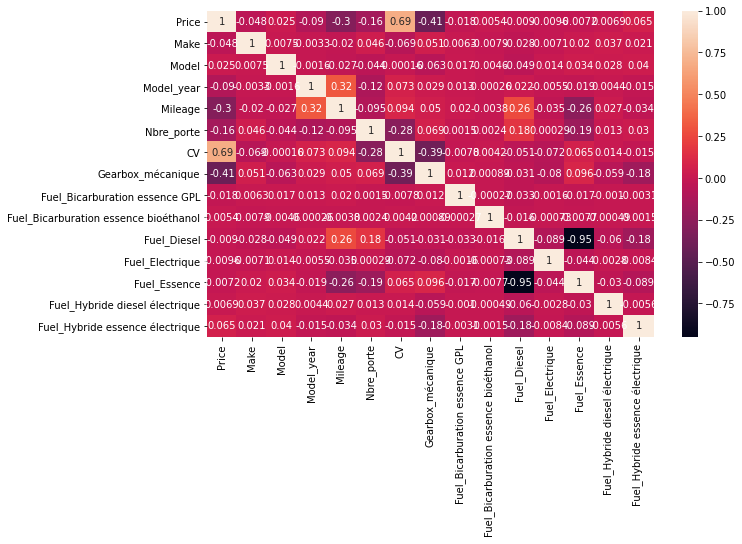

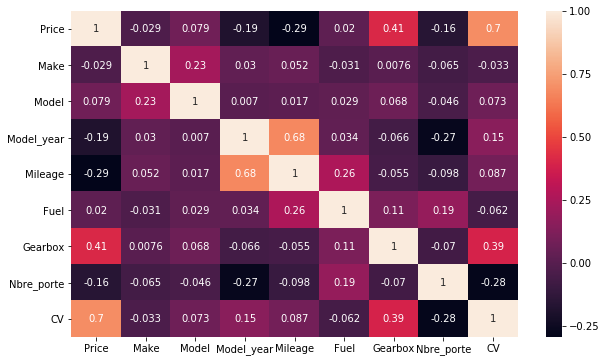

>>>>>>> remote


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(), annot=True)

In [ ]:
df1.describe()

<<<<<<< local


,Price,Make,Model,Model_year,Mileage,Nbre_porte,CV,Gearbox_mécanique,Fuel_Bicarburation essence GPL,Fuel_Bicarburation essence bioéthanol,Fuel_Diesel,Fuel_Electrique,Fuel_Essence,Fuel_Hybride diesel électrique,Fuel_Hybride essence électrique
count,1.654060e+05,165406.000000,165406.000000,1.654060e+05,1.654060e+05,1.654060e+05,1.654060e+05,1.654060e+05,1.654060e+05,1.654060e+05,1.654060e+05,1.654060e+05,1.654060e+05,1.654060e+05,1.654060e+05
mean,-3.848992e-17,39.353445,396.165067,2.777202e-17,-7.446682e-17,-1.217630e-16,-7.057916e-17,-5.584474e-17,-1.890130e-17,-2.019002e-18,7.508970e-17,-1.454111e-17,2.818012e-17,-6.443624e-20,1.372492e-17
std,1.000000e+00,28.606948,242.153880,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.181576e+00,0.000000,0.000000,-3.619146e+02,-9.736248e-01,-6.108825e+00,-1.491058e+00,-1.448668e+00,-2.409821e-02,-1.126835e-02,-1.381719e+00,-6.472251e-02,-6.869081e-01,-4.333225e-02,-1.291578e-01
25%,-4.894108e-01,8.000000,208.000000,-2.866340e-01,-7.829119e-01,4.026916e-01,-4.352484e-01,-1.448668e+00,-2.409821e-02,-1.126835e-02,-1.381719e+00,-6.472251e-02,-6.869081e-01,-4.333225e-02,-1.291578e-01
50%,-2.164710e-01,34.000000,371.000000,-1.661315e-01,-3.403862e-01,4.026916e-01,-2.240865e-01,6.902852e-01,-2.409821e-02,-1.126835e-02,7.237319e-01,-6.472251e-02,-6.869081e-01,-4.333225e-02,-1.291578e-01
75%,2.070963e-01,53.000000,590.000000,1.953760e-01,5.488875e-01,4.026916e-01,1.982373e-01,6.902852e-01,-2.409821e-02,-1.126835e-02,7.237319e-01,-6.472251e-02,1.455790e+00,-4.333225e-02,-1.291578e-01
max,8.972695e+01,87.000000,830.000000,1.381216e+01,2.856731e+01,1.704995e+00,1.561306e+01,6.902852e-01,4.149661e+01,8.874361e+01,7.237319e-01,1.545048e+01,1.455790e+00,2.307736e+01,7.742422e+00


,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Nbre_porte,CV
count,1.633750e+05,163375.000000,163375.000000,163375.000000,163375.000000,163375.000000,163375.000000,163375.000000,163375.000000
mean,1.948271e+04,52.289763,380.292340,3.290130,44516.519712,3.043875,0.322834,4.692444,7.039774
std,1.637316e+04,22.982344,237.935953,3.654168,43406.018448,1.425812,0.467561,0.767056,4.736856
min,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.147900e+04,28.000000,199.000000,1.000000,9009.000000,1.000000,0.000000,5.000000,5.000000
50%,1.586600e+04,59.000000,377.000000,2.000000,29714.000000,4.000000,0.000000,5.000000,6.000000
75%,2.278300e+04,72.000000,561.000000,4.000000,71214.000000,4.000000,1.000000,5.000000,8.000000
max,1.486500e+06,87.000000,818.000000,118.000000,190809.000000,6.000000,1.000000,6.000000,81.000000


>>>>>>> remote


## X & Y 

In [ ]:
Xfeatures1 = df1[[
    "Make",
    "Model", 
    "Model_year",
    "Mileage",
    "Fuel",
    "CV",
    "Nbre_porte",
    "Gearbox"    
]]
ylabels1 = df1['Price']

KeyError: "['Fuel', 'Gearbox'] not in index"

## Split Dataset

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(Xfeatures1, ylabels1, test_size=0.30, random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
lreg = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [ ]:
lreg.fit(X_train1, Y_train1)
y_pred1 = lreg.predict(X_test1)

NameError: name 'lreg' is not defined

In [ ]:
mean_squared_error(Y_test1, y_pred1)

<<<<<<< local


NameError: name 'mean_squared_error' is not defined

114159743.26601969

>>>>>>> remote


In [ ]:
mean_absolute_percentage_error(Y_test1, y_pred1)

<<<<<<< local


NameError: name 'Y_test' is not defined

45.65497820429937

>>>>>>> remote


In [ ]:
r2_score(Y_test1, y_pred1)

<<<<<<< local


NameError: name 'r2_score' is not defined

0.6031522698147723

>>>>>>> remote


In [76]:
def mean_absolute_percentage_error(y_true1, y_pred1):
    y_true1, y_pred1 = np.array(y_true1), np.array(y_pred1)
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100


y_true1 = np.random.randn(100)
y_pred1 = y_true1 * 3.5

print(mean_absolute_percentage_error(y_true1, y_pred1))

250.0


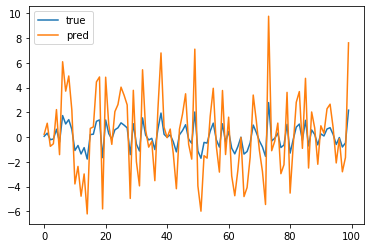

In [77]:
plt.plot(y_true1)
plt.plot(y_pred1)
plt.legend(["true", "pred"])
plt.show()

In [78]:
df7 = df['Model_year']<0
df7.value_counts()

False    165405
Name: Model_year, dtype: int64